# Import Required Libraries
### First we will import all the necessary libraries needed for analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Now that we have all the necessary libraries lets load the data set. We will load it into the pandas DataFrame data.

In [2]:
#data of the swiggy
data=pd.read_csv("Swiggy_50.csv")

#### We read the dataset into the DataFrame data and will have a look at the shape , columns , column data types and the first 5 rows of the data. This will give a brief overview of the data at hand.

In [3]:
data.head()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0
1,McDonald's,American,4.3,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0


#### Thus we get a glimpse of the data set by looking at the first 5 rows returned by df.head(). Optionally we can specify the number of rows to be returned, by sending it as a parameter to the head() function.

In [4]:
# columns of the data
data.columns

Index(['Restaurant Name', 'Category', 'Rating', 'Cost for two', 'Veg', 'city',
       'Area', 'Locality', 'Address', 'Long Distance Delivery'],
      dtype='object')

## Here’s what we know about the columns:
### Demographic information of Cost analysis and Rating
#### ~ Restaurant Name: Name of the restaurant 
#### ~ Category: what type of food itmes he/she has orderd
#### ~ Cost for two: Cost for the food items\
#### ~ Veg: is the item veg or non-veg
#### ~ City: City of the restaurant
#### ~ Area: Area of the restaurant
#### ~ Locality: Location of the restaurant
#### ~ Address: Address of the customer
#### ~ Long Distance Delivery: Is the delivery boy deliverd the food long distance or not
#### ~ Rating : The Rating of the Restaurant in the particular locality

In [5]:
print(data.count())

Restaurant Name           31804
Category                  31804
Rating                    14138
Cost for two              31804
Veg                       31804
city                      31804
Area                      31804
Locality                  31780
Address                   31802
Long Distance Delivery    31804
dtype: int64


In [6]:
data.dtypes

Restaurant Name            object
Category                   object
Rating                    float64
Cost for two                int64
Veg                          bool
city                       object
Area                       object
Locality                   object
Address                    object
Long Distance Delivery      int64
dtype: object

In [7]:
# shape of the data
data.shape

(31804, 10)

In [8]:
# informaation of the data and dattype of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31804 entries, 0 to 31803
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         31804 non-null  object 
 1   Category                31804 non-null  object 
 2   Rating                  14138 non-null  float64
 3   Cost for two            31804 non-null  int64  
 4   Veg                     31804 non-null  bool   
 5   city                    31804 non-null  object 
 6   Area                    31804 non-null  object 
 7   Locality                31780 non-null  object 
 8   Address                 31802 non-null  object 
 9   Long Distance Delivery  31804 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.2+ MB


## Data Cleaning
#### Finding the null values and repalcing it by mean/median/mode 

In [9]:
#finding the null values
data.isnull().sum()

Restaurant Name               0
Category                      0
Rating                    17666
Cost for two                  0
Veg                           0
city                          0
Area                          0
Locality                     24
Address                       2
Long Distance Delivery        0
dtype: int64

In [10]:
# describe of the data
data.describe()

,Rating,Cost for two,Long Distance Delivery
count,14138.000000,31804.000000,31804.000000
mean,3.907745,289.795592,0.358414
std,0.456514,174.896346,0.479542
min,1.100000,0.000000,0.000000
25%,3.700000,200.000000,0.000000
50%,4.000000,250.000000,0.000000
75%,4.200000,300.000000,1.000000
max,5.000000,3100.000000,1.000000


## So in the project  Null values are:
#### We find that the Rating- 17666 (it is a Numeric DataType)
#### Locality - 24, Address - 2 (it is a String  DataType)

### So Rating is a Numerical datatype we can easily replace by the mean of the dataset of the column rating

In [11]:
# mean of the data
mean=data["Rating"].mean()

In [12]:
# repalcing the null values with mean
data.Rating.fillna(mean,inplace=True)

### We can see that the data of the rating coulmns is  Zero After repacing it with the Mean

In [13]:
data.isnull().sum()

Restaurant Name            0
Category                   0
Rating                     0
Cost for two               0
Veg                        0
city                       0
Area                       0
Locality                  24
Address                    2
Long Distance Delivery     0
dtype: int64

### Coming to the Locality and Address we can replae it by any method
#### 1) i have count the most of the locality used by the customers so i have taken the frist and repalce the remaning null values by the most used location
#### 2) find the mode of the address and replace with the null ones

In [14]:
# count the top Locality of the location
data['Locality'].value_counts()

Civil Lines               680
Indirapuram               415
Kothrud                   359
Raj Nagar                 338
Crossing Republic         319
                         ... 
BASEMENT 1, UNIT NO 4       1
Odhav                       1
Galaxy Complex, Naroda      1
Gandhinagar                 1
PVR Bareilly                1
Name: Locality, Length: 5024, dtype: int64

In [15]:
# Replace with the top one
data.Locality.fillna("Civil Lines",inplace=True)

In [16]:
# find the mode of the Address and Replace with the mode
mode_address=data.Address.mode()
mode_address[0]

'DSS NO-41 HUDA MARKET SECTOR 31 FARIDABAD, Faridabad Town, Faridabad, Faridabad, Haryana-121002'

In [17]:
data.Address.fillna(mode_address[0],inplace=True)

### Checking the null values again
#### So their is no null values form this the data cleaning has been completed

In [18]:
data.isnull()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
31799,False,False,False,False,False,False,False,False,False,False
31800,False,False,False,False,False,False,False,False,False,False
31801,False,False,False,False,False,False,False,False,False,False
31802,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isnull().sum()

Restaurant Name           0
Category                  0
Rating                    0
Cost for two              0
Veg                       0
city                      0
Area                      0
Locality                  0
Address                   0
Long Distance Delivery    0
dtype: int64

## Univariate Analysis
### Lets have a look at the distribution of various variables in the Data set.


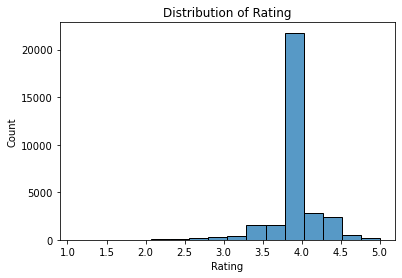

In [20]:
# HISTOGRAM - sns.histplot() , for the rating
sns.histplot(x='Rating',data=data)
plt.title('Distribution of Rating')
plt.show()

#### Here we see that the mostly 3.5 to 4.5 the  Rating is high .

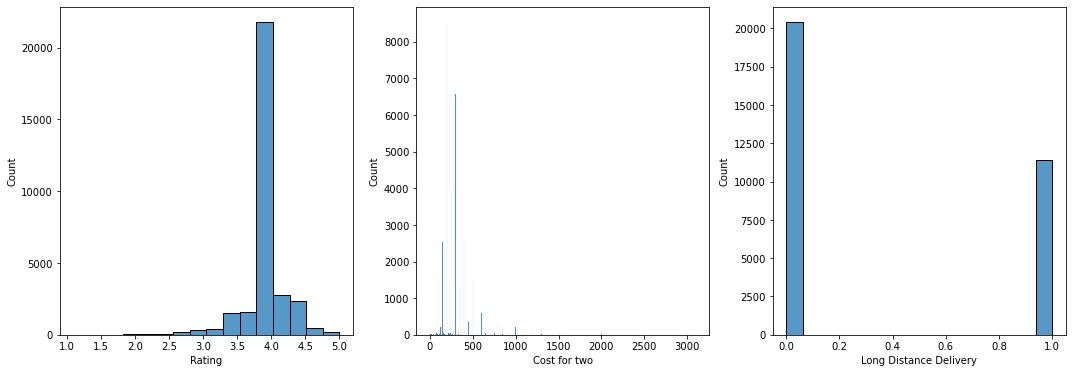

In [21]:
# The reamining cols for the numerical datatypes showing in the histogram
cols = 3
rows = 2
num_cols = data.select_dtypes(exclude=['object','bool']).columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Density'>

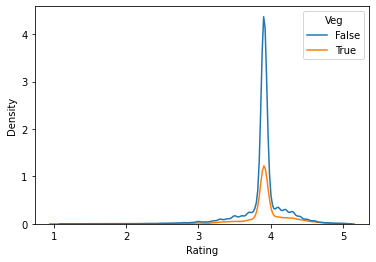

In [22]:
# 2. KDE PLOT - Kernal Density Plot - sns.kdeplot()
sns.kdeplot(x='Rating', data=data, hue='Veg')

<AxesSubplot:xlabel='Rating', ylabel='Count'>

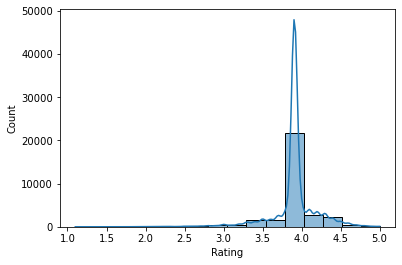

In [23]:
# with histogram - sns.histplot(kde=TRUE)
sns.histplot(x='Rating', data=data, kde=True)

### For the Rating column the outliers are lie in between 1-5 so we are not aware about the outliers

<AxesSubplot:xlabel='Rating'>

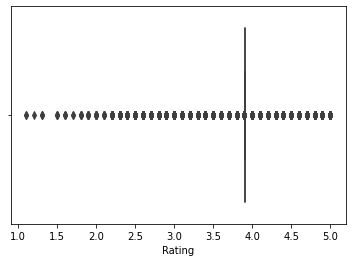

In [24]:
# 4. BOX PLOTS - sns.boxplot()
sns.boxplot(x=data['Rating'])

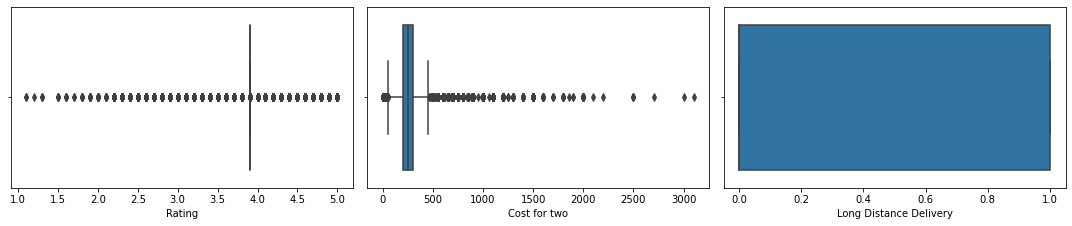

In [25]:
cols = 3
rows = 3
num_cols = data.select_dtypes(exclude=['object','bool']).columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=data[col], ax=ax)
    
fig.tight_layout()  
plt.show()

### We are counting the number of orders has taken in each city showing in the below 

C:\Users\chall\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


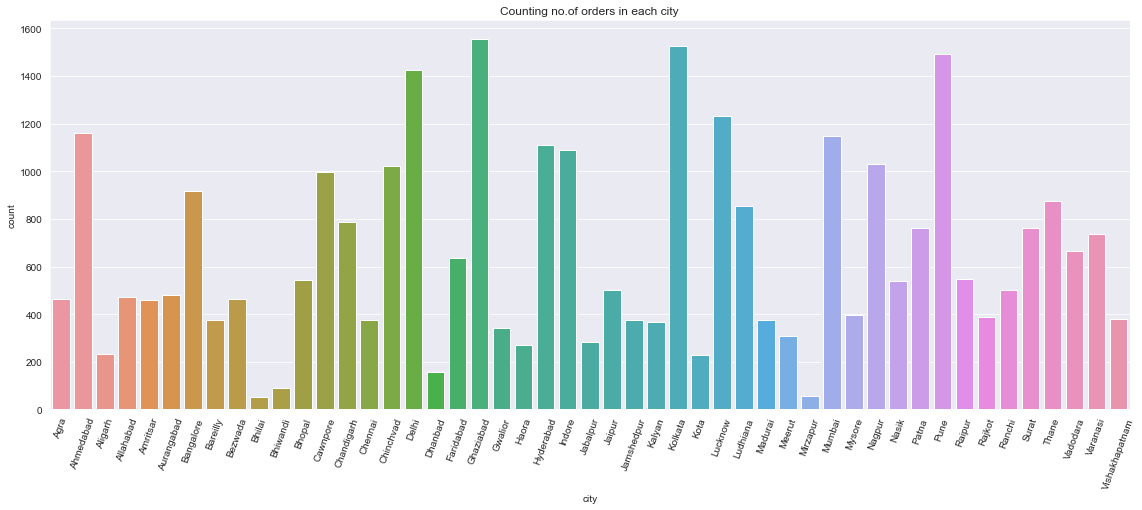

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,7))
sns.countplot(data["city"].sort_values())
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("Counting no.of orders in each city")
plt.show()